<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/_posts/machine_learning/ch14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow
### Rank & Tensor
텐서는 데이터를 담고 있는 다차원배열

랭크는 텐서의 차원을 의미함(정수나 실수같은 스칼라는 랭크가 0인 텐서, 벡터는 랭크1인 텐서, 행렬은 랭크2인 텐서)

### 텐서의 랭크와 크기를 확인하기

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
import numpy as np

# 텐서 정의
t1 = tf.constant(np.pi)
t2 = tf.constant([1,2,3,4])
t3 = tf.constant([[1,2], [3,4]])

# 랭크 확인
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

# 크기 확인
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()

print('크기:', s1, s2, s3)
print('랭크:', r1.numpy(), r2.numpy(), r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서를 다차원 배열로의 변환

In [0]:
import tensorflow as tf
import numpy as np

arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])

T1 = tf.constant(arr)
print(T1)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)


In [0]:
s = T1.get_shape()

print('T1의 크기:', s)
print('T1의 크기:', T1.shape)

T1의 크기: (3, 4)
T1의 크기: (3, 4)


In [0]:
T2 = tf.Variable(np.random.normal(size = s))
print(T2)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-1.63246222, -0.42681701,  0.71522782, -0.84449521],
       [ 0.90108304,  1.12569306,  0.77601897,  0.63955153],
       [-0.32781222,  1.69501443,  0.31533969,  0.29962497]])>


In [0]:
T3 = tf.Variable(np.random.normal(size = s[0]))
print(T3)

<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([-1.48185974, -0.67685158, -2.38403235])>


In [0]:
# 텐서의 크기 변환 tf.reshape이용
# shape중 하나에 -1을 사용할 수 있음()
T4 = tf.reshape(T1, shape = [1, 1, -1])
print(T4)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)


In [0]:
T5 = tf.reshape(T1, shape = [1, 3, -1])
print(T5)

tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [0]:
# 전치
# perm으로 차원지정
T6 = tf.transpose(T5, perm = [2, 1, 0])
print(T6)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)


In [0]:
T7 = tf.transpose(T5, perm = [0, 2, 1])
print(T7)

tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [0]:
# 텐서 분할
t5_split = tf.split(T5, num_or_size_splits = 2, axis = 2)
print(t5_split)

[<tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [0]:
# concat함수를 이용한 같은 dtype 텐서 합성
# t1,t2의 숫자를 바꿔가며 연습해볼 것
t1 = tf.ones(shape = (5, 1), dtype = tf.float32)
t2 = tf.zeros(shape = (5, 1), dtype = tf.float32)

print(t1)
print(t2)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


In [0]:
t3 = tf.concat([t1, t2], axis = 0)
print(t3)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)


In [0]:
t4 = tf.concat([t1,t2], axis = 1)
print(t4)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


In [0]:
# tensorflow 계산
# z = 2 * (a - b) + c
a = tf.constant(1)
b = tf.constant(2)
c = tf.constant(3)

z = 2 * (a - b) + c

print(z.numpy())

1


tensorflow 2.x에서는 tf.function데코레이터를 사용하여 일반 파이썬 함수를 호출가능한 그래프 객체로 만들어 놓는다.

In [0]:
@tf.function
def simple_func():
  a = tf.constant(1)
  b = tf.constant(2)
  c = tf.constant(3)

  z = 2 * (a - b) + c
  
  return z

print(simple_func().numpy())

1


In [0]:
# 데코레이터에 의해 객체가 바뀌었음을 확인
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [0]:
# 다른방식으로 표현
# 데코레이터가 아닌 재정의를 통한 방법
def simple_func():
  a = tf.constant(1, name = 'a')
  b = tf.constant(2, name = 'b')
  c = tf.constant(3, name = 'c')

  z = 2 * (a - b) + c

  return z

simple_func = tf.function(simple_func)
print(simple_func().numpy())


1


In [0]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [0]:
# 그래프 정의
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## tensorflow의 변수
https://www.tensorflow.org/guide/variables
참고

변수 정의: tf.Variable((initial_value), name = (optional_name))

In [0]:
w2 = tf.Variable(np.array([[1,2,3,4], [2,3,4,5]]))
print(w2)

<tf.Variable 'Variable:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [2, 3, 4, 5]])>


In [0]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [3 4 5 6]], shape=(2, 4), dtype=int64)


In [0]:
# assign 메소드 이용
w2.assign(w2 + 1)
print(w2.numpy())
# 바로적용되는 것을 확인 할 수 있음

[[2 3 4 5]
 [3 4 5 6]]


## keras API

### Sequential model

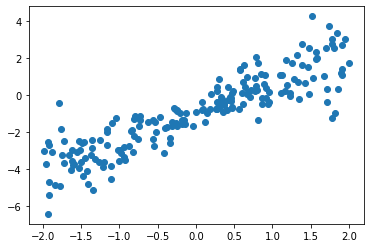

In [0]:
# 간단한 회귀용 데이터 생성
# 샘플개수 200개
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def make_random_data():
  x = np.random.uniform(low = -2, high = 2, size = 200)
  y = []
  for t in x:
    r = np.random.normal(loc = 0.0, 
                         scale = (0.5 + t*t/3),
                         size = None)
    y.append(r)
  return x, 1.726 * x - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

In [0]:
# 훈련 150ro 테스트 50개로 split
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[:150]

In [0]:
# 모델 생성
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 모델 컴파일 
# 경사하강법 옵티마이저 = SGD, 손실함수 = MSE
model.compile(optimizer = 'sgd', loss = 'mse')

# 모델 학습
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 0s 2ms/sample - loss: 1.6696 - val_loss: 1.3776
Epoch 2/500
105/105 [==============================] - 0s 156us/sample - loss: 1.5248 - val_loss: 1.2908
Epoch 3/500
105/105 [==============================] - 0s 138us/sample - loss: 1.4055 - val_loss: 1.2101
Epoch 4/500
105/105 [==============================] - 0s 142us/sample - loss: 1.3062 - val_loss: 1.1436
Epoch 5/500
105/105 [==============================] - 0s 176us/sample - loss: 1.2200 - val_loss: 1.0875
Epoch 6/500
105/105 [==============================] - 0s 145us/sample - loss: 1.1502 - val_loss: 1.0433
Epoch 7/500
105/105 [==============================] - 0s 154us/sample - loss: 1.0893 - val_loss: 1.0002
Epoch 8/500
105/105 [==============================] - 0s 203us/sample - loss: 1.0287 - val_loss: 0.9735
Epoch 9/500
105/105 [==============================] - 0s 235us/sample - loss: 0.9896 - val_loss: 0.9487
Epoch 10/500

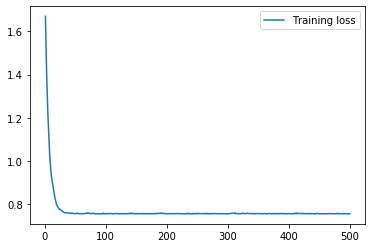

In [0]:
# 시각화
epochs = np.arange(1, 500 + 1)
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.legend()
plt.show()

## 함수형 API
복잡한 모델을 만들때 이용

In [0]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape = (1,))
output = tf.keras.layers.Dense(1)(input)

In [0]:
dense = tf.keras.layers.Dense(1)
output = dense(input)

# 다르게도 쓸 수 있음
# dense = tf.keras.layers.Dense(1)
# ouput = dense.__call__(input)

In [0]:
model = tf.keras.Model(input, output)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 나머지는 기존의 sequential model과 동일
model.compile(optimizer = 'sgd', loss = 'mse')
history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/500
105/105 [==============================] - 0s 2ms/sample - loss: 1.6597 - val_loss: 1.4337
Epoch 2/500
105/105 [==============================] - 0s 158us/sample - loss: 1.5217 - val_loss: 1.3011
Epoch 3/500
105/105 [==============================] - 0s 144us/sample - loss: 1.3848 - val_loss: 1.2167
Epoch 4/500
105/105 [==============================] - 0s 145us/sample - loss: 1.2892 - val_loss: 1.1527
Epoch 5/500
105/105 [==============================] - 0s 150us/sample - loss: 1.2128 - val_loss: 1.0988
Epoch 6/500
105/105 [==============================] - 0s 144us/sample - loss: 1.1473 - val_loss: 1.0556
Epoch 7/500
105/105 [==============================] - 0s 218us/sample - loss: 1.0942 - val_loss: 1.0196
Epoch 8/500
105/105 [==============================] - 0s 157us/sample - loss: 1.0483 - val_loss: 0.9822
Epoch 9/500
105/105 [==============================] - 0s 149us/sample - loss: 1.0014 - val_loss: 0.9583
Epoch 10/500

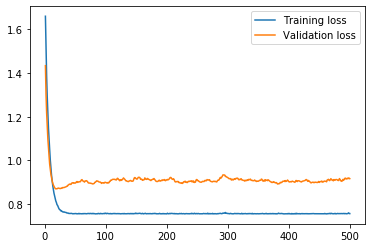

In [0]:
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

# ???? validation loss가 뭔가 이상하다...? ㅠㅠ 왜이래 또...

## tf.keras모델의 저장 & 복원

In [0]:
# save_weight 메소드 이용(현재폴더에 파일 생성 후 모든 가중치를 저장)
model.save_weights('simple_weights.h5')

In [0]:
# load_weights메소드를 사용하여 복원
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))
model.compile(optimizer = 'sgd', loss = 'mse')

model.load_weights('simple_weights.h5')

In [0]:
# save 메소드를 사용하여 모델 전체를 저장
model.save('simple_model.h5')

In [0]:
# load_model메소드를 이용하여 모델 복원
model = tf.keras.models.load_model('simple_model.h5')

### ModelCheckpoint
모델을 훈련하면서 최고의 가중치를 저장할 수 있음

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))
model.compile(optimizer = 'sgd', loss = 'mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath = 'my_model.h5', monitor = 'val_loss',
                                                    save_best_only = True),
                 tf.keras.callbacks.EarlyStopping(patience = 5)]

history = model.fit(x_train, y_train, epochs = 500, validation_split = 0.2, callbacks = callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 2ms/sample - loss: 1.6717 - val_loss: 1.2468
Epoch 2/500
120/120 [==============================] - 0s 178us/sample - loss: 1.5313 - val_loss: 1.1597
Epoch 3/500
120/120 [==============================] - 0s 171us/sample - loss: 1.4166 - val_loss: 1.0901
Epoch 4/500
120/120 [==============================] - 0s 181us/sample - loss: 1.3225 - val_loss: 1.0329
Epoch 5/500
120/120 [==============================] - 0s 190us/sample - loss: 1.2402 - val_loss: 0.9868
Epoch 6/500
120/120 [==============================] - 0s 192us/sample - loss: 1.1735 - val_loss: 0.9496
Epoch 7/500
120/120 [==============================] - 0s 192us/sample - loss: 1.1201 - val_loss: 0.9159
Epoch 8/500
120/120 [==============================] - 0s 171us/sample - loss: 1.0683 - val_loss: 0.8895
Epoch 9/500
120/120 [==============================] - 0s 212us/sample - loss: 1.0255 - val_loss: 0.8694
Epoch 10/500

In [0]:
epochs = np.arange(1, len(history.history['loss']) + 1)
plt.plot()

## 케라스 층 그래프 그리기

In [0]:
input = tf.keras.Input(shape = (784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

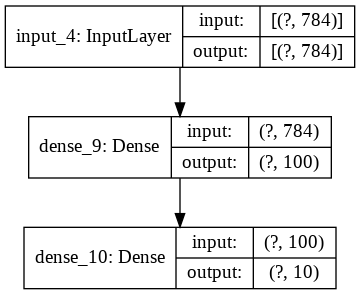

In [0]:
# plot_model 함수 사용
# to_file의 parameter로는 저장할 파일 이름
tf.keras.utils.plot_model(model, show_shapes = True, to_file = 'model_1.png')